- 5가지 업종의 기술통계량 (describe)
- 5개 각 업종별로 연령대, 성별, 가족 생애 주기 별 비율 구하기

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
plt.rcParams['axes.unicode_minus']=False

In [5]:
df = pd.read_csv('1,2,3월_5가지업종.csv')
df

,Unnamed: 0,Unnamed: 0.1,년월,업종명,연령대,성별,생애주기,고객수,금액,건수
0,0,598167,201901,카페,20s,2,1,3,24890,3
1,1,598168,201901,카페,20s,2,1,3,17800,3
2,2,598169,201901,카페,30s,2,2,3,28500,4
3,3,598170,201901,카페,20s,1,1,3,27900,4
4,4,598171,201901,카페,40s,1,3,3,20600,3
...,...,...,...,...,...,...,...,...,...,...
224535,363235,23899428,202003,일반 음식점업,20s,1,1,8,904800,16
224536,363236,23899429,202003,일반 음식점업,30s,1,1,3,331800,4
224537,363237,23899430,202003,일반 음식점업,30s,1,2,7,1153000,28
224538,363238,23899431,202003,일반 음식점업,40s,1,3,3,73000,3


In [6]:
df_sub=df[['년월', '업종명', '연령대', '성별', '생애주기', '고객수', '금액','건수']]

In [7]:
df_a=df_sub
df_a['연령대'] = df_a['연령대'].str.rstrip('s').astype('int')
df_a

C:\Users\LG\anaconda3\envs\tens_2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,년월,업종명,연령대,성별,생애주기,고객수,금액,건수
0,201901,카페,20,2,1,3,24890,3
1,201901,카페,20,2,1,3,17800,3
2,201901,카페,30,2,2,3,28500,4
3,201901,카페,20,1,1,3,27900,4
4,201901,카페,40,1,3,3,20600,3
...,...,...,...,...,...,...,...,...
224535,202003,일반 음식점업,20,1,1,8,904800,16
224536,202003,일반 음식점업,30,1,1,3,331800,4
224537,202003,일반 음식점업,30,1,2,7,1153000,28
224538,202003,일반 음식점업,40,1,3,3,73000,3


In [8]:
df_sub.groupby(['업종명'])['건수'].count().reset_index()

,업종명,건수
0,관광업,5264
1,스포츠 및 레크레이션 용품 임대업,11301
2,일반 음식점업,165688
3,전시 및 행사 대행업,6217
4,카페,36070


In [9]:
df_sub.describe().round(3)

,년월,연령대,성별,생애주기,고객수,금액,건수
count,224540.000,224540.000,224540.000,224540.000,224540.000,2.245400e+05,224540.000
mean,201944.957,38.320,1.388,2.838,68.377,2.753633e+06,96.910
std,49.394,14.231,0.487,1.377,433.249,2.116965e+07,657.649
min,201901.000,10.000,1.000,1.000,3.000,3.700000e+03,1.000
25%,201902.000,30.000,1.000,2.000,4.000,7.280000e+04,5.000
50%,201903.000,40.000,1.000,3.000,8.000,2.045000e+05,10.000
75%,202001.000,50.000,2.000,4.000,22.000,7.471125e+05,30.000
max,202003.000,70.000,2.000,5.000,22289.000,1.361516e+09,36889.000


## 모든 업종에 대한 기술 통계량
- 평균 연령 : 38.320세
- 전체 이용건수 평균 : 96.910건
- 이용 고객수 평균 : 68.377명

In [10]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224540 entries, 0 to 224539
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   년월      224540 non-null  int64 
 1   업종명     224540 non-null  object
 2   연령대     224540 non-null  int32 
 3   성별      224540 non-null  int64 
 4   생애주기    224540 non-null  int64 
 5   고객수     224540 non-null  int64 
 6   금액      224540 non-null  int64 
 7   건수      224540 non-null  int64 
dtypes: int32(1), int64(6), object(1)
memory usage: 12.8+ MB


***
# 카페

In [11]:
cafe = df_sub['업종명']=="카페"
nineteenJ = df['년월']==201901
nineteenF = df['년월']==201902
nineteenM = df['년월']==201903
twentyJ = df['년월']==202001
twentyF = df['년월']==202002
twentyM = df['년월']==202003
df_2019_cafe=df_sub[(nineteenJ|nineteenF|nineteenM)&cafe]
df_2020_cafe=df_sub[(twentyJ|twentyF|twentyM)&cafe]
df_2020_cafe

,년월,업종명,연령대,성별,생애주기,고객수,금액,건수
46425,202001,카페,30,1,2,3,33600,3
46426,202001,카페,20,2,1,3,25700,3
46427,202001,카페,50,1,4,3,31800,4
46428,202001,카페,50,2,4,3,50600,3
46429,202001,카페,20,1,1,4,27100,4
...,...,...,...,...,...,...,...,...
223758,202003,카페,30,1,2,3,29600,5
223759,202003,카페,40,1,3,3,21800,7
223760,202003,카페,20,2,1,3,7500,3
223761,202003,카페,20,1,1,6,54900,7


# 연령대 비율

In [12]:
# 2019년 표에서 연령대별 수 count
print(df_2019_cafe.연령대.unique())
df_2019_cafe_age = pd.DataFrame(df_2019_cafe.연령대.value_counts().sort_index(ascending=True))
df_2019_cafe_age

[20 30 40 50 60 70 10]


,연령대
10,357
20,5759
30,4997
40,3971
50,3251
60,1337
70,378


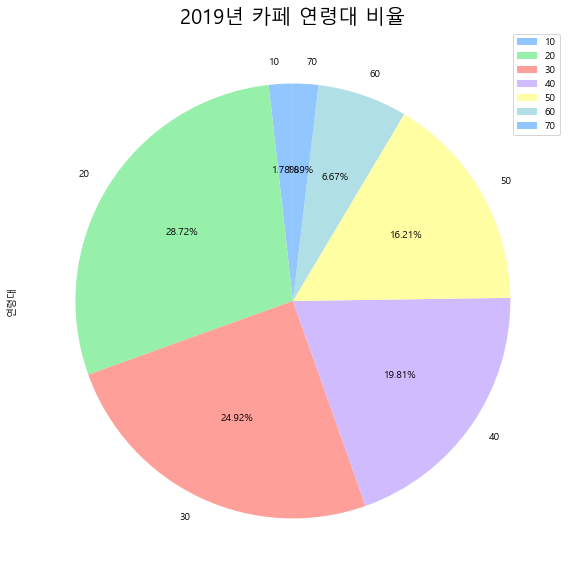

In [13]:
plt.style.use('seaborn-pastel')
df_2019_cafe_age.plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%', startangle = 90, subplots=True)
plt.title('2019년 카페 연령대 비율', size = 20)
plt.show()

In [14]:
# 2020년 표에서 연령대별 수 count
print(df_2020_cafe.연령대.unique())
df_2020_cafe_age = pd.DataFrame(df_2020_cafe.연령대.value_counts().sort_index(ascending=True))
df_2020_cafe_age

[30 20 50 40 60 10 70]


,연령대
10,503
20,4453
30,3786
40,3332
50,2524
60,1101
70,321


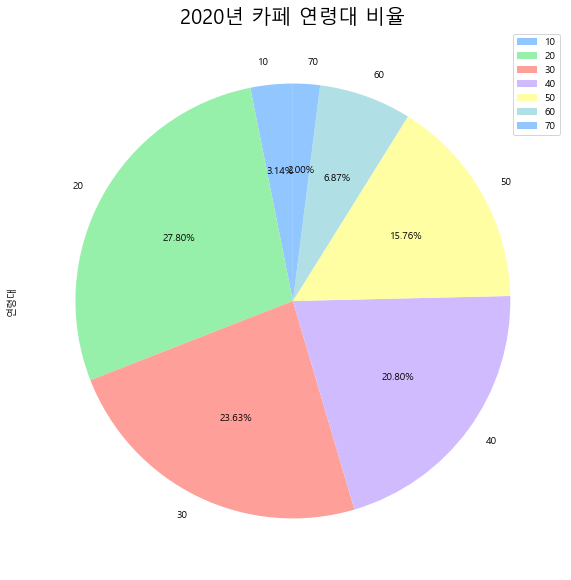

In [15]:
plt.style.use('seaborn-pastel')
df_2020_cafe_age.plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%', startangle = 90, subplots=True)
plt.title('2020년 카페 연령대 비율', size = 20)
plt.show()

# 가족 생애 주기

In [16]:
# 2019년 표에서 가족생애주기별 수 count
print(df_2019_cafe.생애주기.unique())
df_2019_cafe_fam = pd.DataFrame(df_2019_cafe.생애주기.value_counts().sort_index(ascending=True))
df_2019_cafe_fam

[1 2 3 4 5]


,생애주기
1,6094
2,5333
3,2816
4,4092
5,1715


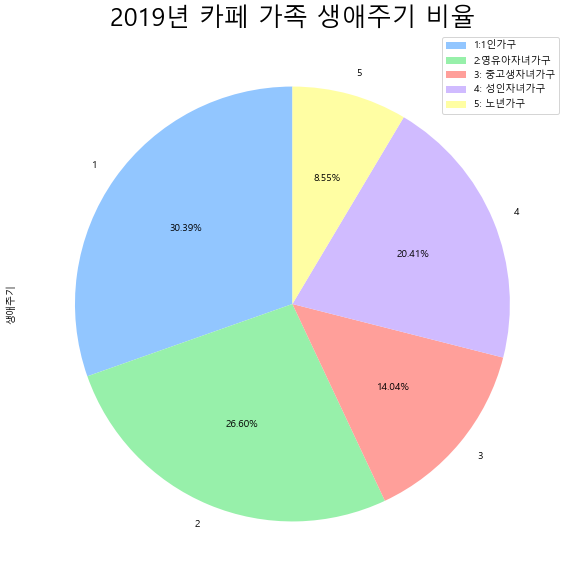

In [17]:
df_2019_cafe_fam.plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%', startangle = 90, subplots=True)
plt.title('2019년 카페 가족 생애주기 비율', size = 25)
plt.legend(labels=('1:1인가구', '2:영유아자녀가구', '3: 중고생자녀가구', '4: 성인자녀가구', '5: 노년가구'))
plt.show()

In [18]:
# 2020년 표에서 가족생애주기별 수 count
print(df_2020_cafe.생애주기.unique())
df_2020_cafe_fam = pd.DataFrame(df_2020_cafe.생애주기.value_counts().sort_index(ascending=True))
df_2020_cafe_fam

[2 1 4 3 5]


,생애주기
1,4931
2,4141
3,2291
4,3235
5,1422


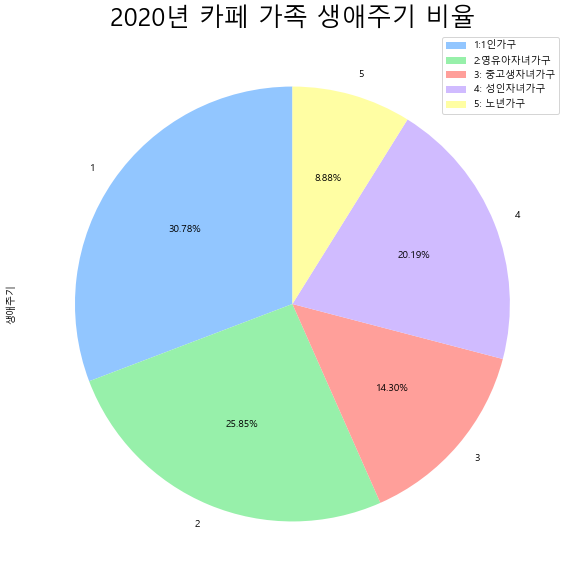

In [19]:
df_2020_cafe_fam.plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%', startangle = 90, subplots=True)
plt.title('2020년 카페 가족 생애주기 비율', size = 25)
plt.legend(labels=('1:1인가구', '2:영유아자녀가구', '3: 중고생자녀가구', '4: 성인자녀가구', '5: 노년가구'))
plt.show()

***

# 스포츠

In [20]:
sports = df_sub['업종명']=="스포츠 및 레크레이션 용품 임대업"
nineteenJ = df['년월']==201901
nineteenF = df['년월']==201902
nineteenM = df['년월']==201903
twentyJ = df['년월']==202001
twentyF = df['년월']==202002
twentyM = df['년월']==202003
df_2019_sports=df_sub[(nineteenJ|nineteenF|nineteenM)&sports]
df_2020_sports=df_sub[(twentyJ|twentyF|twentyM)&sports]

# 연령대 비율

In [21]:
# 2019년 표에서 연령대별 수 count
print(df_2019_sports.연령대.unique())
df_2019_sports_age = pd.DataFrame(df_2019_sports.연령대.value_counts().sort_index(ascending=True))
df_2019_sports_age

[60 20 30 40 50 70 10]


,연령대
10,91
20,1099
30,1155
40,1482
50,1245
60,834
70,399


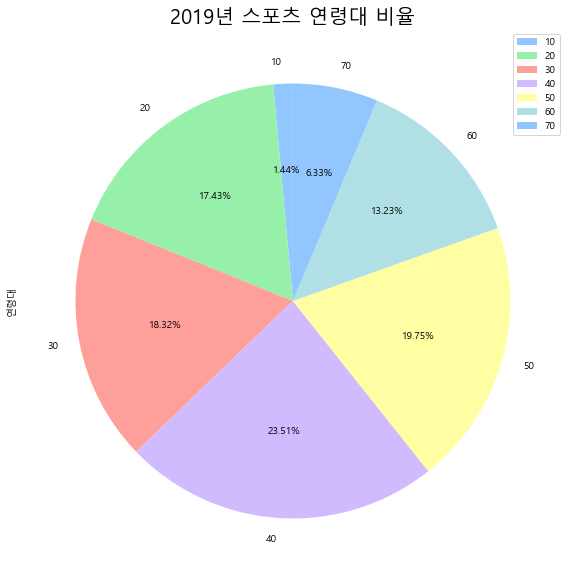

In [22]:
plt.style.use('seaborn-pastel')
df_2019_sports_age.plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%', startangle = 90, subplots=True)
plt.title('2019년 스포츠 연령대 비율', size = 20)
plt.show()

In [23]:
# 2020년 표에서 연령대별 수 count
print(df_2020_sports.연령대.unique())
df_2020_sports_age = pd.DataFrame(df_2020_sports.연령대.value_counts().sort_index(ascending=True))
df_2020_sports_age

[20 30 40 50 60 70 10]


,연령대
10,124
20,872
30,901
40,1188
50,982
60,657
70,272


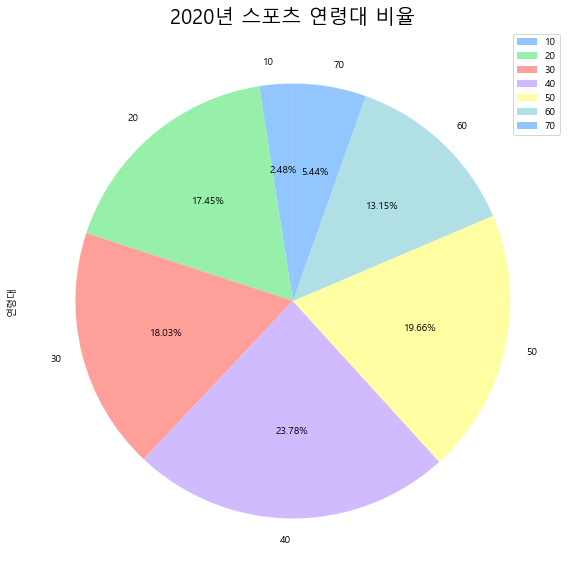

In [24]:
plt.style.use('seaborn-pastel')
df_2020_sports_age.plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%', startangle = 90, subplots=True)
plt.title('2020년 스포츠 연령대 비율', size = 20)
plt.show()

# 가족 생애 주기 비율

In [25]:
# 2019년 표에서 가족생애주기별 수 count
print(df_2019_sports.생애주기.unique())
df_2019_sports_fam = pd.DataFrame(df_2019_sports.생애주기.value_counts().sort_index(ascending=True))
df_2019_sports_fam

[5 1 2 3 4]


,생애주기
1,1197
2,1278
3,924
4,1673
5,1233


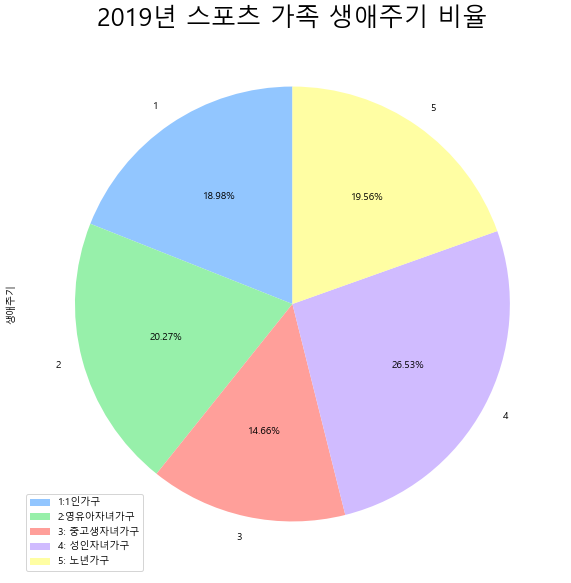

In [26]:
df_2019_sports_fam.plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%', startangle = 90, subplots=True)
plt.title('2019년 스포츠 가족 생애주기 비율', size = 25)
plt.legend(labels=('1:1인가구', '2:영유아자녀가구', '3: 중고생자녀가구', '4: 성인자녀가구', '5: 노년가구'))
plt.show()

In [27]:
# 2020년 표에서 가족생애주기별 수 count
print(df_2020_sports.생애주기.unique())
df_2020_sports_fam = pd.DataFrame(df_2020_sports.생애주기.value_counts().sort_index(ascending=True))
df_2020_sports_fam

[1 2 3 4 5]


,생애주기
1,989
2,1002
3,744
4,1332
5,929


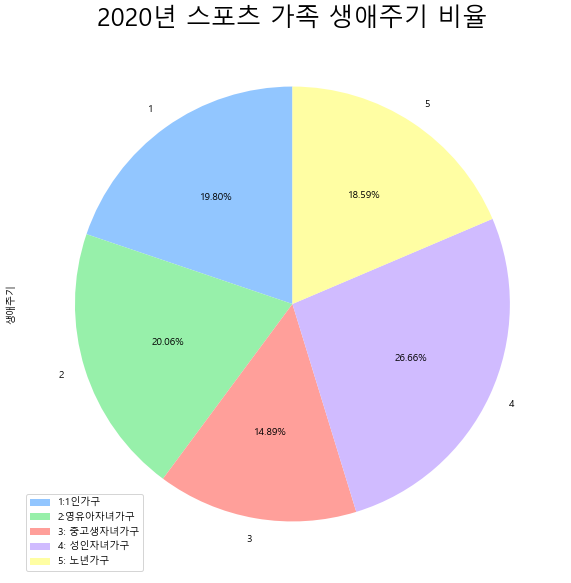

In [28]:
df_2020_sports_fam.plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%', startangle = 90, subplots=True)
plt.title('2020년 스포츠 가족 생애주기 비율', size = 25)
plt.legend(labels=('1:1인가구', '2:영유아자녀가구', '3: 중고생자녀가구', '4: 성인자녀가구', '5: 노년가구'))
plt.show()

***
# 관광업

In [29]:
tour = df['업종명']=="관광업"
nineteenJ = df['년월']==201901
nineteenF = df['년월']==201902
nineteenM = df['년월']==201903
twentyJ = df['년월']==202001
twentyF = df['년월']==202002
twentyM = df['년월']==202003
df_2019_tour=df_sub[(nineteenJ|nineteenF|nineteenM)&tour]
df_2020_tour=df_sub[(twentyJ|twentyF|twentyM)&tour]

# 연령대 비율

In [30]:
# 2019년 표에서 연령대별 수 count
print(df_2019_tour.연령대.unique())
df_2019_tour_age = pd.DataFrame(df_2019_tour.연령대.value_counts().sort_index(ascending=True))
df_2019_tour_age

[50 60 30 40 20 70]


,연령대
20,134
30,619
40,861
50,887
60,636
70,202


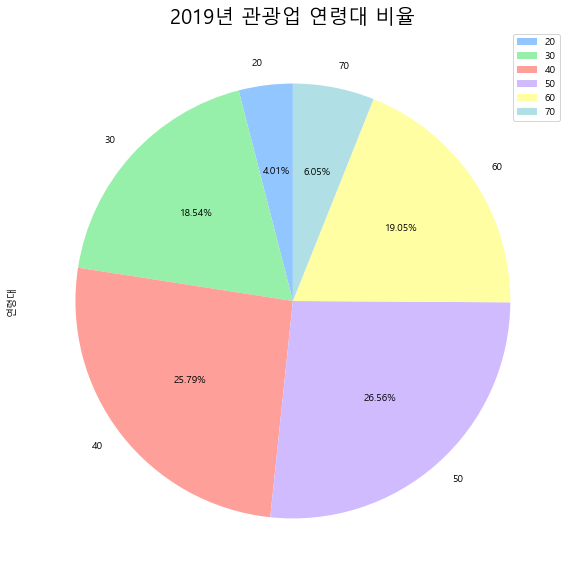

In [31]:
plt.style.use('seaborn-pastel')
df_2019_tour_age.plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%', startangle = 90, subplots=True)
plt.title('2019년 관광업 연령대 비율', size = 20)
plt.show()

In [32]:
# 2020년 표에서 연령대별 수 count
print(df_2020_tour.연령대.unique())
df_2020_tour_age = pd.DataFrame(df_2020_tour.연령대.value_counts().sort_index(ascending=True))
df_2020_tour_age

[40 60 30 50 10 20 70]


,연령대
10,2
20,100
30,370
40,470
50,538
60,347
70,98


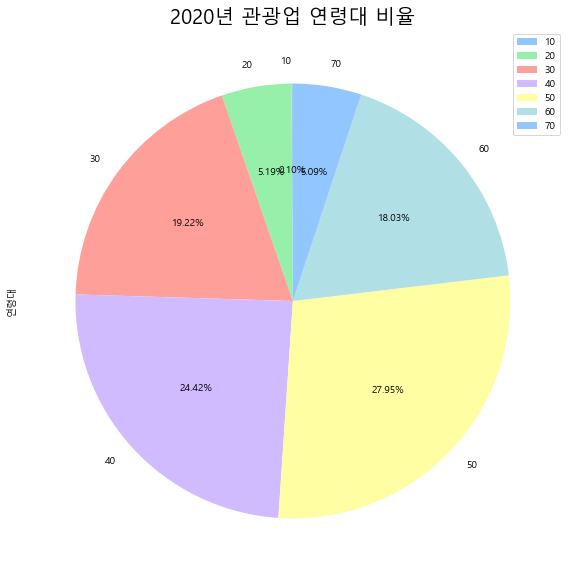

In [33]:
plt.style.use('seaborn-pastel')
df_2020_tour_age.plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%', startangle = 90, subplots=True)
plt.title('2020년 관광업 연령대 비율', size = 20)
plt.show()

# 가족 생애 주기 비율

In [34]:
# 2019년 표에서 가족생애주기별 수 count
print(df_2019_tour.생애주기.unique())
df_2019_tour_fam = pd.DataFrame(df_2019_tour.생애주기.value_counts().sort_index(ascending=True))
df_2019_tour_fam

[4 5 2 3 1]


,생애주기
1,146
2,670
3,706
4,979
5,838


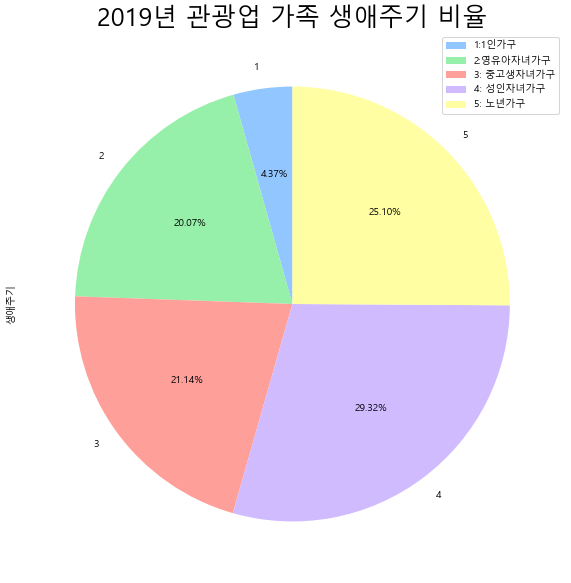

In [35]:
df_2019_tour_fam.plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%', startangle = 90, subplots=True)
plt.title('2019년 관광업 가족 생애주기 비율', size = 25)
plt.legend(labels=('1:1인가구', '2:영유아자녀가구', '3: 중고생자녀가구', '4: 성인자녀가구', '5: 노년가구'))
plt.show()

In [36]:
# 2020년 표에서 가족생애주기별 수 count
print(df_2020_tour.생애주기.unique())
df_2020_tour_fam = pd.DataFrame(df_2020_tour.생애주기.value_counts().sort_index(ascending=True))
df_2020_tour_fam

[3 5 2 4 1]


,생애주기
1,109
2,390
3,380
4,601
5,445


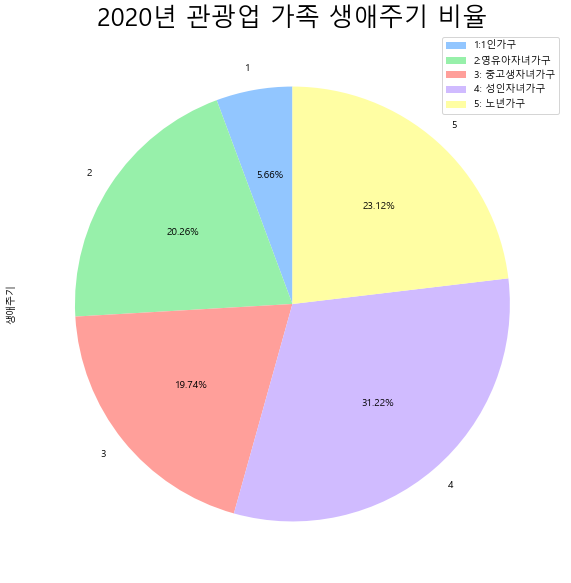

In [37]:
df_2020_tour_fam.plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%', startangle = 90, subplots=True)
plt.title('2020년 관광업 가족 생애주기 비율', size = 25)
plt.legend(labels=('1:1인가구', '2:영유아자녀가구', '3: 중고생자녀가구', '4: 성인자녀가구', '5: 노년가구'))
plt.show()

***
# 일반 음식점업

In [38]:
food = df_sub['업종명']=="일반 음식점업"
nineteenJ = df['년월']==201901
nineteenF = df['년월']==201902
nineteenM = df['년월']==201903
twentyJ = df['년월']==202001
twentyF = df['년월']==202002
twentyM = df['년월']==202003
df_2019_food=df_sub[(nineteenJ|nineteenF|nineteenM)&food]
df_2020_food=df_sub[(twentyJ|twentyF|twentyM)&food]

# 연령대 비율

In [39]:
# 2019년 표에서 연령대별 수 count
print(df_2019_food.연령대.unique())
df_2019_food_age = pd.DataFrame(df_2019_food.연령대.value_counts().sort_index(ascending=True))
df_2019_food_age

[50 20 30 40 60 70 10]


,연령대
10,751
20,18751
30,20448
40,22889
50,17682
60,10675
70,3089


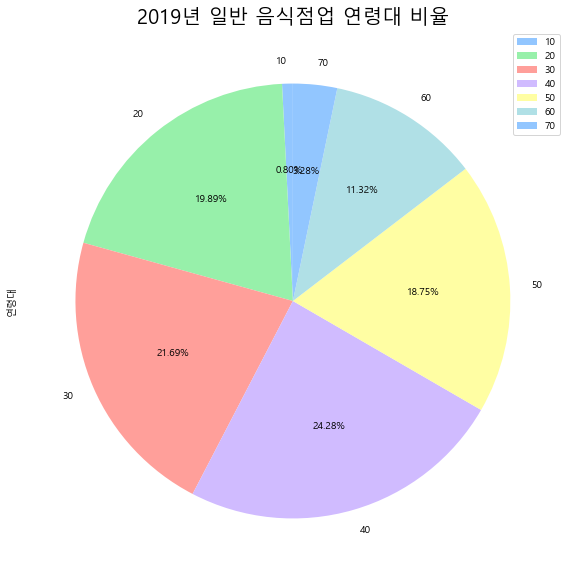

In [40]:
plt.style.use('seaborn-pastel')
df_2019_food_age.plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%', startangle = 90, subplots=True)
plt.title('2019년 일반 음식점업 연령대 비율', size = 20)
plt.show()

In [41]:
# 2020년 표에서 연령대별 수 count
print(df_2020_food.연령대.unique())
df_2020_food_age = pd.DataFrame(df_2020_food.연령대.value_counts().sort_index(ascending=True))
df_2020_food_age

[20 30 40 50 60 70 10]


,연령대
10,1105
20,13832
30,14855
40,17470
50,13838
60,8096
70,2207


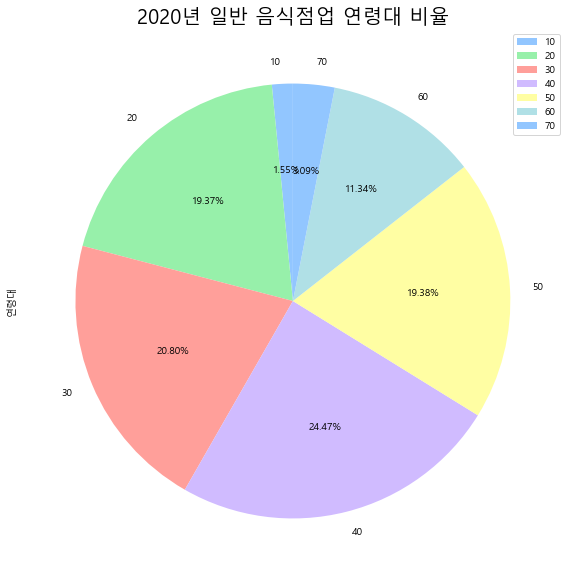

In [42]:
plt.style.use('seaborn-pastel')
df_2020_food_age.plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%', startangle = 90, subplots=True)
plt.title('2020년 일반 음식점업 연령대 비율', size = 20)
plt.show()

# 가족 생애 주기 비율

In [43]:
# 2019년 표에서 가족생애주기별 수 count
print(df_2019_food.생애주기.unique())
df_2019_food_fam = pd.DataFrame(df_2019_food.생애주기.value_counts().sort_index(ascending=True))
df_2019_food_fam

[4 1 2 3 5]


,생애주기
1,20208
2,22253
3,15173
4,22887
5,13764


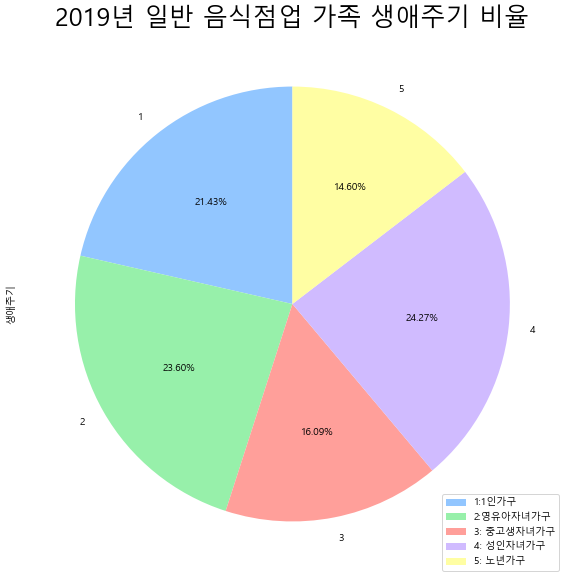

In [44]:
df_2019_food_fam.plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%', startangle = 90, subplots=True)
plt.title('2019년 일반 음식점업 가족 생애주기 비율', size = 25)
plt.legend(labels=('1:1인가구', '2:영유아자녀가구', '3: 중고생자녀가구', '4: 성인자녀가구', '5: 노년가구'))
plt.show()

In [45]:
# 2020년 표에서 가족생애주기별 수 count
print(df_2020_food.생애주기.unique())
df_2020_food_fam = pd.DataFrame(df_2020_food.생애주기.value_counts().sort_index(ascending=True))
df_2020_food_fam

[1 2 3 4 5]


,생애주기
1,15430
2,16143
3,11558
4,17969
5,10303


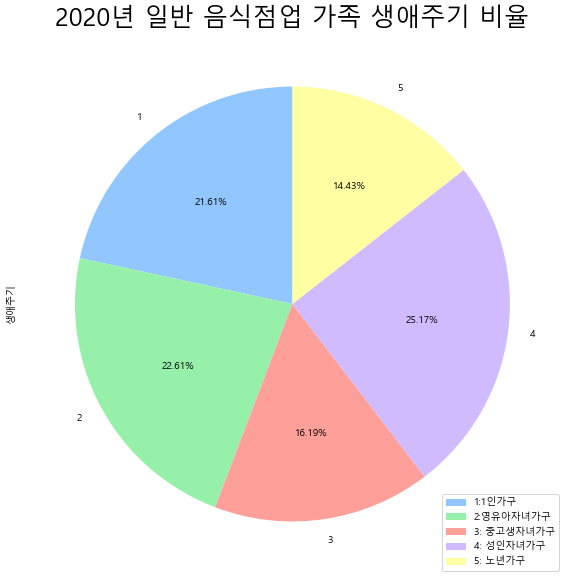

In [46]:
df_2020_food_fam.plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%', startangle = 90, subplots=True)
plt.title('2020년 일반 음식점업 가족 생애주기 비율', size = 25)
plt.legend(labels=('1:1인가구', '2:영유아자녀가구', '3: 중고생자녀가구', '4: 성인자녀가구', '5: 노년가구'))
plt.show()

# 전시 및 행사 대행업

In [47]:
dis = df_sub['업종명']=="전시 및 행사 대행업"
nineteenJ = df['년월']==201901
nineteenF = df['년월']==201902
nineteenM = df['년월']==201903
twentyJ = df['년월']==202001
twentyF = df['년월']==202002
twentyM = df['년월']==202003
df_2019_dis=df_sub[(nineteenJ|nineteenF|nineteenM)&dis]
df_2020_dis=df_sub[(twentyJ|twentyF|twentyM)&dis]

# 연령대

In [48]:
print(df_2019_dis.연령대.unique())
df_2019_dis_age = pd.DataFrame(df_2019_dis.연령대.value_counts().sort_index(ascending=True))
df_2019_dis_age

[10 20 60 30 40 50 70]


,연령대
10,4
20,531
30,981
40,1277
50,759
60,318
70,47


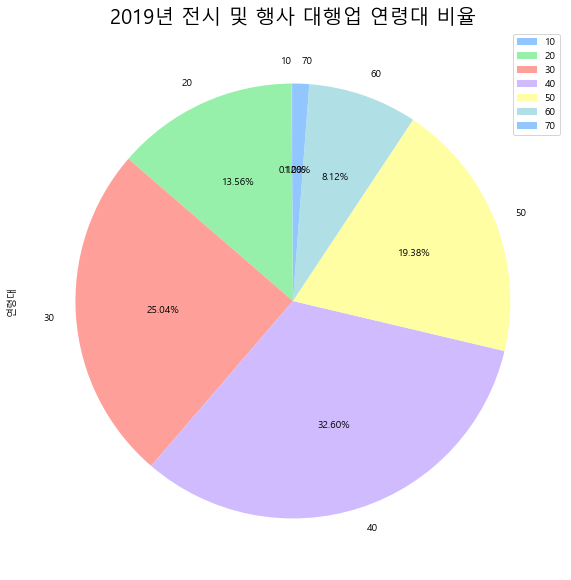

In [49]:
plt.style.use('seaborn-pastel')
df_2019_dis_age.plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%', startangle = 90, subplots=True)
plt.title('2019년 전시 및 행사 대행업 연령대 비율', size = 20)
plt.show()

In [50]:
print(df_2020_dis.연령대.unique())
df_2020_dis_age = pd.DataFrame(df_2020_dis.연령대.value_counts().sort_index(ascending=True))
df_2020_dis_age

[10 20 30 60 40 50 70]


,연령대
10,6
20,395
30,575
40,653
50,467
60,180
70,24


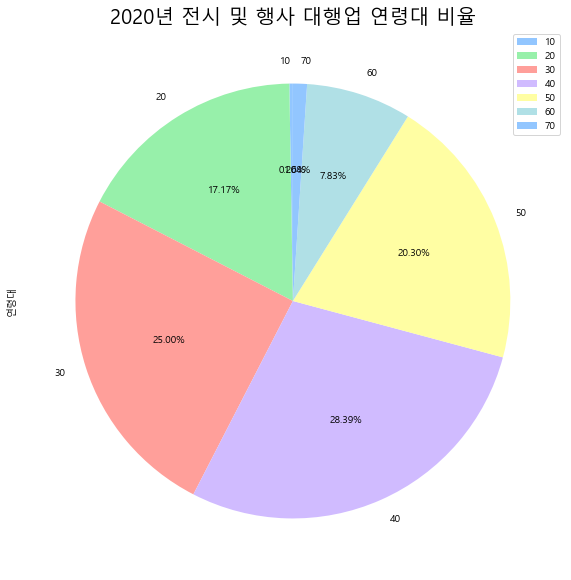

In [51]:
plt.style.use('seaborn-pastel')
df_2020_dis_age.plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%', startangle = 90, subplots=True)
plt.title('2020년 전시 및 행사 대행업 연령대 비율', size = 20)
plt.show()

# 생애주기

In [52]:
print(df_2019_dis.생애주기.unique())
df_2019_dis_fam = pd.DataFrame(df_2019_dis.생애주기.value_counts().sort_index(ascending=True))
df_2019_dis_fam

[1 5 2 3 4]


,생애주기
1,521
2,1094
3,1119
4,818
5,365


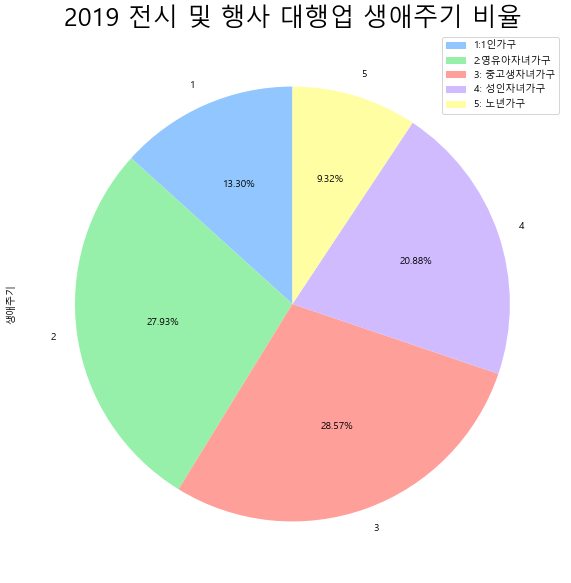

In [53]:
df_2019_dis_fam.plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%', startangle = 90, subplots=True)
plt.title('2019 전시 및 행사 대행업 생애주기 비율', size = 25)
plt.legend(labels=('1:1인가구', '2:영유아자녀가구', '3: 중고생자녀가구', '4: 성인자녀가구', '5: 노년가구'))
plt.show()

In [54]:
print(df_2020_dis.생애주기.unique())
df_2020_dis_fam = pd.DataFrame(df_2020_dis.생애주기.value_counts().sort_index(ascending=True))
df_2020_dis_fam

[1 2 5 3 4]


,생애주기
1,394
2,627
3,574
4,501
5,204


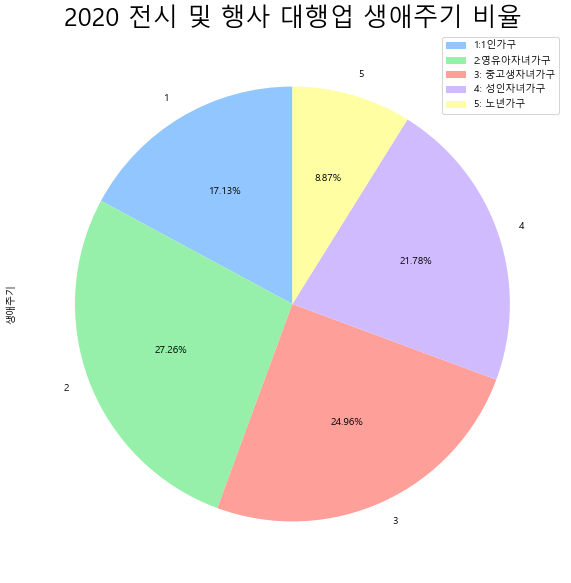

In [55]:
df_2020_dis_fam.plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%', startangle = 90, subplots=True)
plt.title('2020 전시 및 행사 대행업 생애주기 비율', size = 25)
plt.legend(labels=('1:1인가구', '2:영유아자녀가구', '3: 중고생자녀가구', '4: 성인자녀가구', '5: 노년가구'))
plt.show()